In [1]:
from KAN_VIS_statik import kan_weights_vis
from KAN_for import df_foward_kan
import os
os.chdir('../KAN-Model')
from kan import KAN
from kan import MultKAN
import torch


In [2]:
#data sollte schon früher eingeladen werden um auführungszeit zu sparen
dataset = torch.load('../data/MNIST/mnist_train_input.pth')
data_test = torch.load('../data/MNIST/mnist_test_input.pth')
original_img = data_test['test_input'][:1]

In [24]:
def streamlit_kan_static_api(path: str,hidden_1: int, hidden_2: int) -> None:
    # params model
    hidden_1 = hidden_1
    hidden_2 = hidden_2
    input_dim = dataset['train_input'].shape[ 1 ]   # Anzahl der Eingabefunktionen
    output_dim = 10   # Anzahl der Klasse
    #load model
    if hidden_2 != 0:   
        model = KAN(width=[input_dim, hidden_1, hidden_2, output_dim], grid= 3 , k= 3 , seed= 42)
    else:
        model = KAN(width=[input_dim, hidden_1, output_dim], grid= 3 , k= 3 , seed= 42) 
    model = model.loadckpt(path)
    img = kan_weights_vis(model,2)
    
    return img

checkpoint directory created: ./model
saving model version 0.0
Aktuelles Verzeichnis: c:\Users\a829727\OneDrive - Eviden\Dokumente\Uni\Semester 6\AML\KAN\KAN-project\KAN-Model
Input shape: torch.Size([10000, 64])
Expected width: 64


KeyboardInterrupt: 

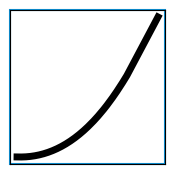

In [25]:
from PIL import Image
img = streamlit_kan_static_api("./Modelle/model_mnist_h_3_s_45_g_3_k_3",3,0)
img.show()

In [3]:
def streamlit_kan_inference_api(path: str, image, hidden_1: int, hidden_2: int) -> None:
    
    # params model
    hidden_1 = hidden_1
    hidden_2 = hidden_2
    input_dim = dataset['train_input'].shape[ 1 ]   # Anzahl der Eingabefunktionen
    output_dim = 10   # Anzahl der Klasse
    #load model
    if hidden_2 != 0:   
        model = KAN(width=[input_dim, hidden_1, hidden_2, output_dim], grid= 3 , k= 3 , seed= 42)
    else:
        model = KAN(width=[input_dim, hidden_1, output_dim], grid= 3 , k= 3 , seed= 42) 
    model = model.loadckpt(path)
    
    pred_df, img = df_foward_kan(model, image,dataset)
    
    return pred_df, img

In [4]:
pred_df, img = streamlit_kan_inference_api("./Modelle/model_mnist_h_3_s_45_g_3_k_3",original_img,3,0)

checkpoint directory created: ./model
saving model version 0.0
Aktuelles Verzeichnis: c:\Users\a829727\OneDrive - Eviden\Dokumente\Uni\Semester 6\AML\KAN\KAN-project\KAN-Model
Input shape: torch.Size([2, 64])
Expected width: 64
Input shape: torch.Size([60000, 64])
Expected width: 64


In [6]:
img.show()

In [5]:
pred_df

,Wahrscheinlichkeit
0,8.223034e-02
1,1.915958e-04
2,1.967320e-05
3,3.327454e-04
4,2.851963e-07
5,9.579399e-03
6,3.657858e-04
7,9.069442e-01
8,1.114446e-04
9,2.245061e-04
